# Assignment 3
Solve the 2D wave equation for eigenmodes and eigenfrequencies of membranes (square, rectangle, circle) with fixed boundaries. Discretize, compute eigenvalues, analyze frequency dependence on size, and visualize time evolution. Also, solve the steady-state diffusion equation on a circular domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from IPython.display import HTML

from src.config import *

----
## 3.1 Eigenmodus of drums or membranes of different shapes
Lorem ipsum odor amet, consectetuer adipiscing elit. Varius nullam vulputate lobortis porttitor in odio mus dictum. Tellus phasellus congue hac, tempus montes ullamcorper himenaeos. Arcu bibendum convallis lacus taciti rutrum ac dictumst mollis. Cras nullam est nostra netus nascetur iaculis hendrerit. Odio parturient purus maecenas consectetur porta hendrerit lobortis sodales. Maecenas quisque gravida sed nisi odio pellentesque habitasse. Cras tempus lacinia rhoncus conubia duis massa. Sem nibh dui mus consequat facilisi. Porta malesuada porttitor neque turpis molestie?

Consequat dictum curabitur integer suspendisse inceptos. Habitant mattis odio lorem nostra feugiat vitae vel habitasse. Scelerisque vehicula turpis eleifend, felis aptent venenatis ante fames. Tincidunt auctor quam ipsum velit ornare augue. Etiam habitant felis diam; ullamcorper netus aenean consectetur leo. Purus phasellus potenti tortor maecenas pulvinar. Auctor cras cursus hac tempor nam leo ad.

_by: Tycho Stam_

In [2]:
from src.grid_discretization import (
    initialize_grid_vector,
    initialize_tridiagonal_matrix,
)
from src.eigen_solver import (
    solve_eigenvalues,
)
from src.get_frequency import get_frequencies_list
from script.create_plot import (
    create_seaborn_heatmap,
    plot_eigenfrequency,
    plot_eigenmode_animation,
    plot_multiple_eigenmodes,
    plot_eigenmodus,
)

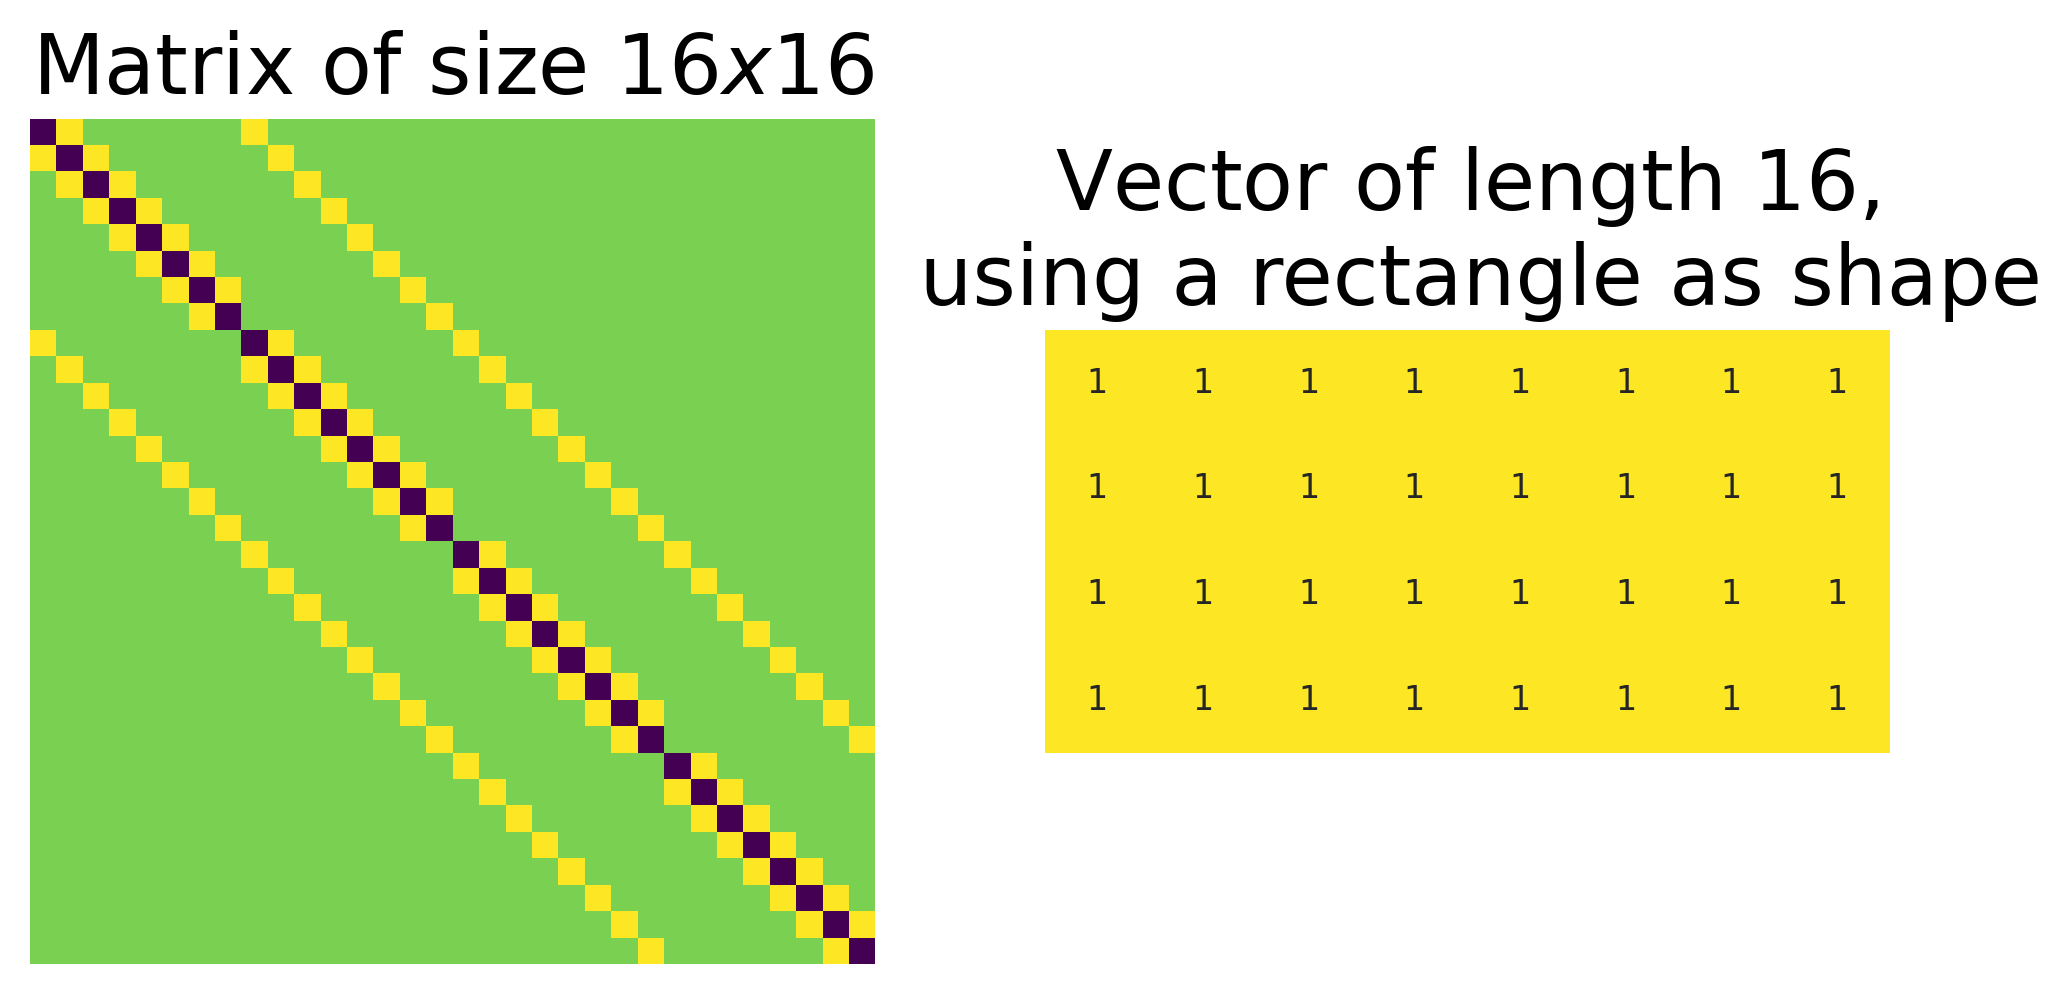

In [3]:
L = 4
shape = "rectangle"

v = initialize_grid_vector(L, shape=shape)
M = initialize_tridiagonal_matrix(v, L)

_, ax = plt.subplots(1, 2, figsize=(FIG_SIZE), dpi=FIG_DPI)

create_seaborn_heatmap(M.toarray(), ax[0])
ax[0].set_title(f"Matrix of size ${L**2} x {L**2}$", fontsize=FIG_TITLE_SIZE)

create_seaborn_heatmap(
    v.reshape(L, L if not shape == "rectangle" else L * 2),
    ax[1],
    True,
    True,
)
ax[1].set_title(
    f"Vector of length ${L**2}$,\n using a {shape} as shape", fontsize=FIG_TITLE_SIZE
)

plt.show()

In [4]:
shapes = ["square", "rectangle", "circle"]

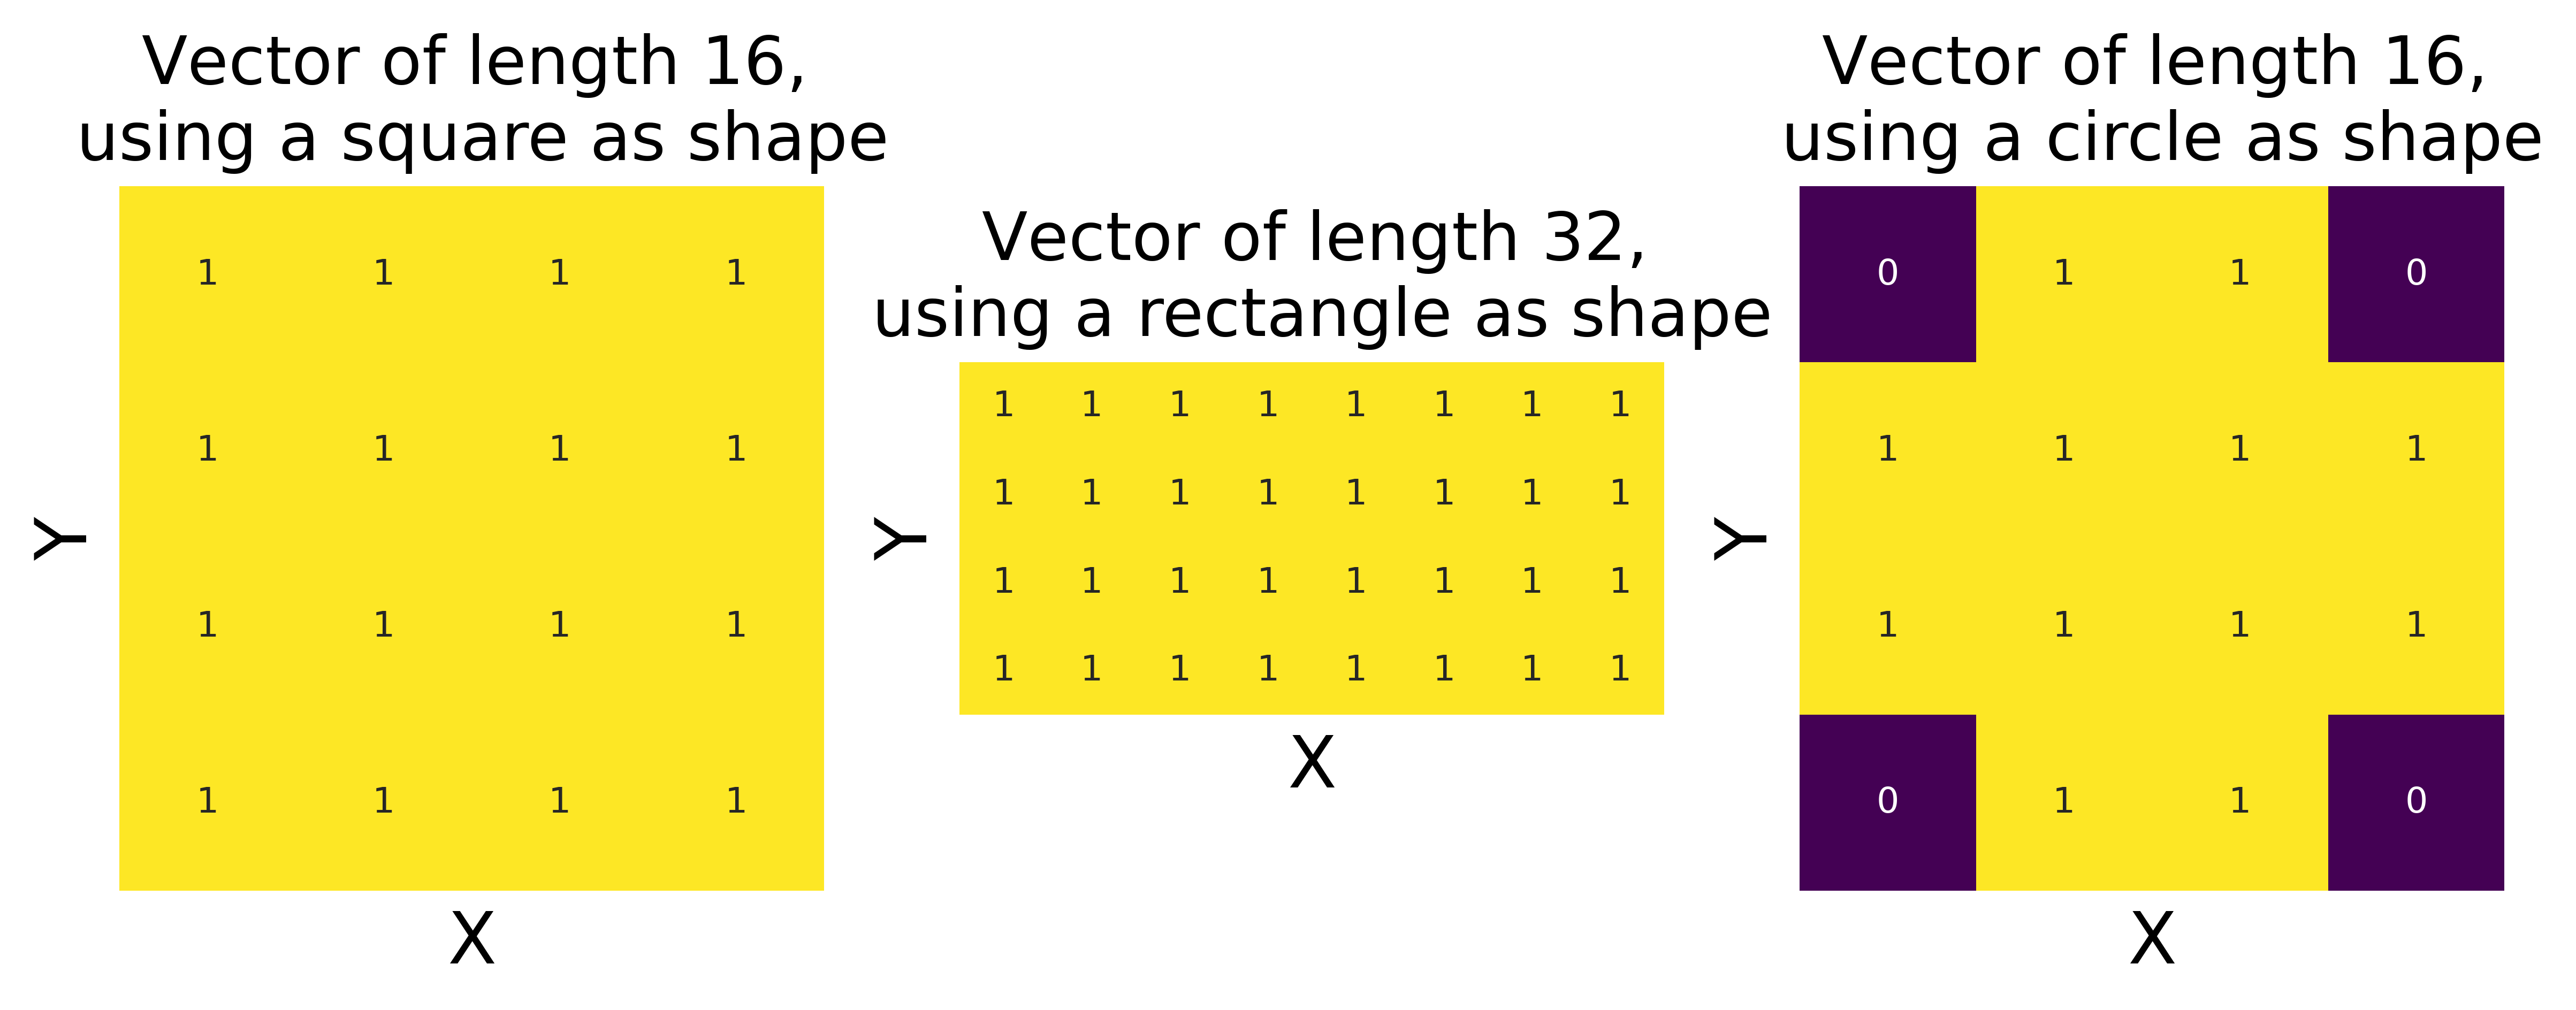

In [ ]:
_, ax = plt.subplots(1, len(shapes), figsize=(FIG_SIZE), dpi=FIG_DPI * 2)

for i, shape in enumerate(shapes):
    v = initialize_grid_vector(L, shape=shape)

    create_seaborn_heatmap(
        v.reshape(L, L if not shape == "rectangle" else L * 2), ax[i], False, True
    )
    ax[i].set_title(
        f"Vector of shape {shape}",
        fontsize=FIG_LABEL_SIZE - 1,
    )
    ax[i].set_xlabel(f"{L if shape != 'rectangle' else 2 * L}", fontsize=FIG_LABEL_SIZE)
    ax[i].set_ylabel(f"{L}", fontsize=FIG_LABEL_SIZE)
    ax[i].tick_params(axis="both", labelsize=FIG_TICK_SIZE)

plt.tight_layout()
plt.savefig(f"{FIG_DIR}vector_shapes.png", bbox_inches="tight", dpi=FIG_DPI)
plt.show()
plt.close()

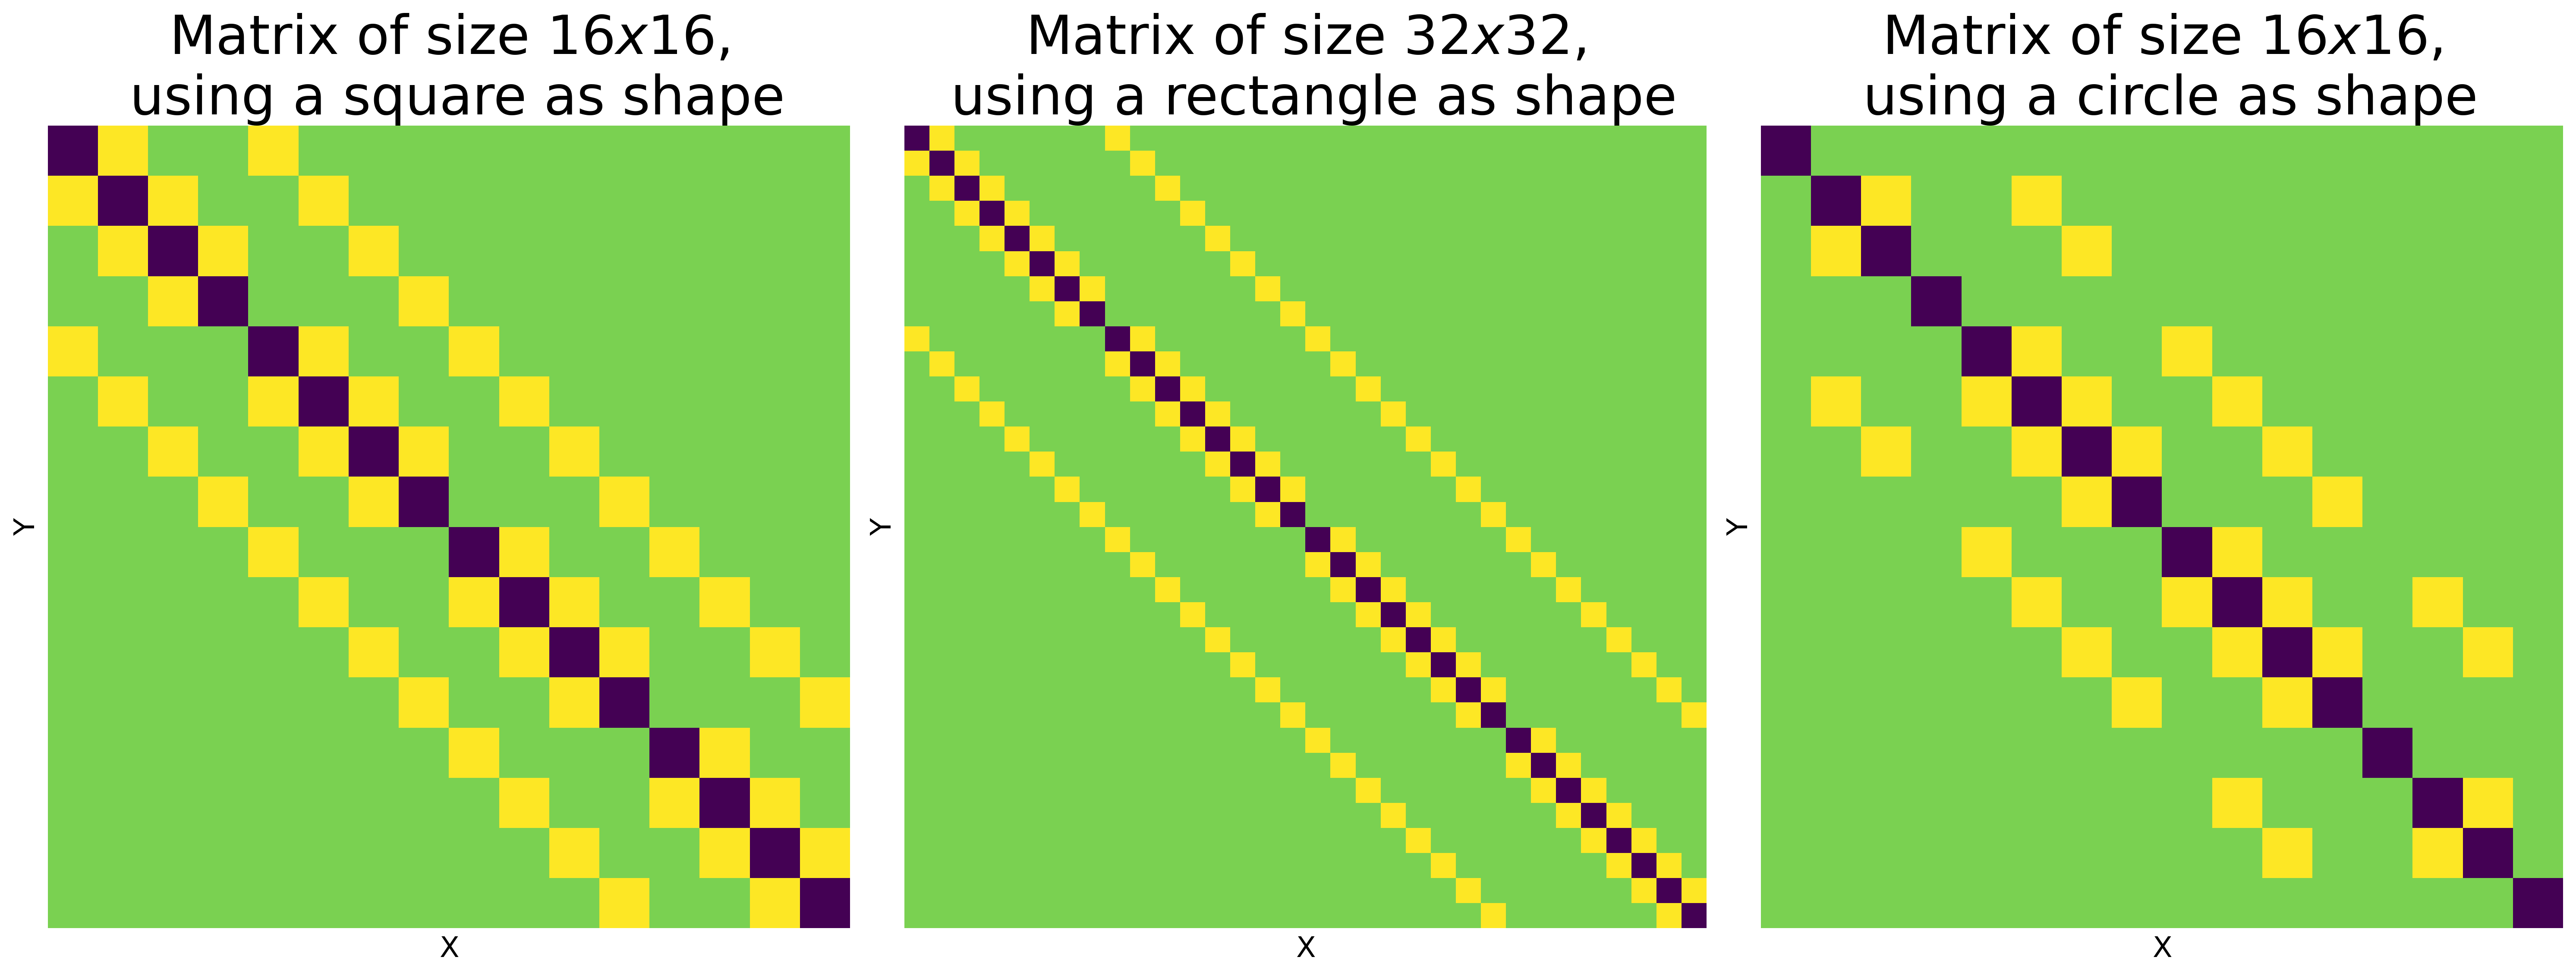

In [ ]:
_, ax = plt.subplots(
    1, len(shapes), figsize=(len(shapes) * 7, 8), constrained_layout=True
)

for i, shape in enumerate(shapes):
    v = initialize_grid_vector(L, shape=shape)
    M = initialize_tridiagonal_matrix(v, L)

    create_seaborn_heatmap(M.toarray(), ax[i], False, True)
    ax[i].set_title(
        f"Neighbour matrix of shape {shape}",
        fontsize=FIG_TITLE_SIZE,
    )
    side_length = L if shape != "rectangle" else 2 * L
    side_length *= side_length

    ax[i].set_xlabel(f"{side_length}", fontsize=FIG_LABEL_SIZE * 2)
    ax[i].set_ylabel(f"{side_length}", fontsize=FIG_LABEL_SIZE * 2)
    ax[i].tick_params(axis="both", labelsize=FIG_TICK_SIZE)

plt.tight_layout()
plt.savefig(f"{FIG_DIR}matrix_shapes.png", bbox_inches="tight", dpi=FIG_DPI)
plt.show()
plt.close()

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.00 seconds with matrix of size 1, N=1
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.00 seconds with matrix of size 2, N=1
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.00 seconds with matrix of size 1, N=1


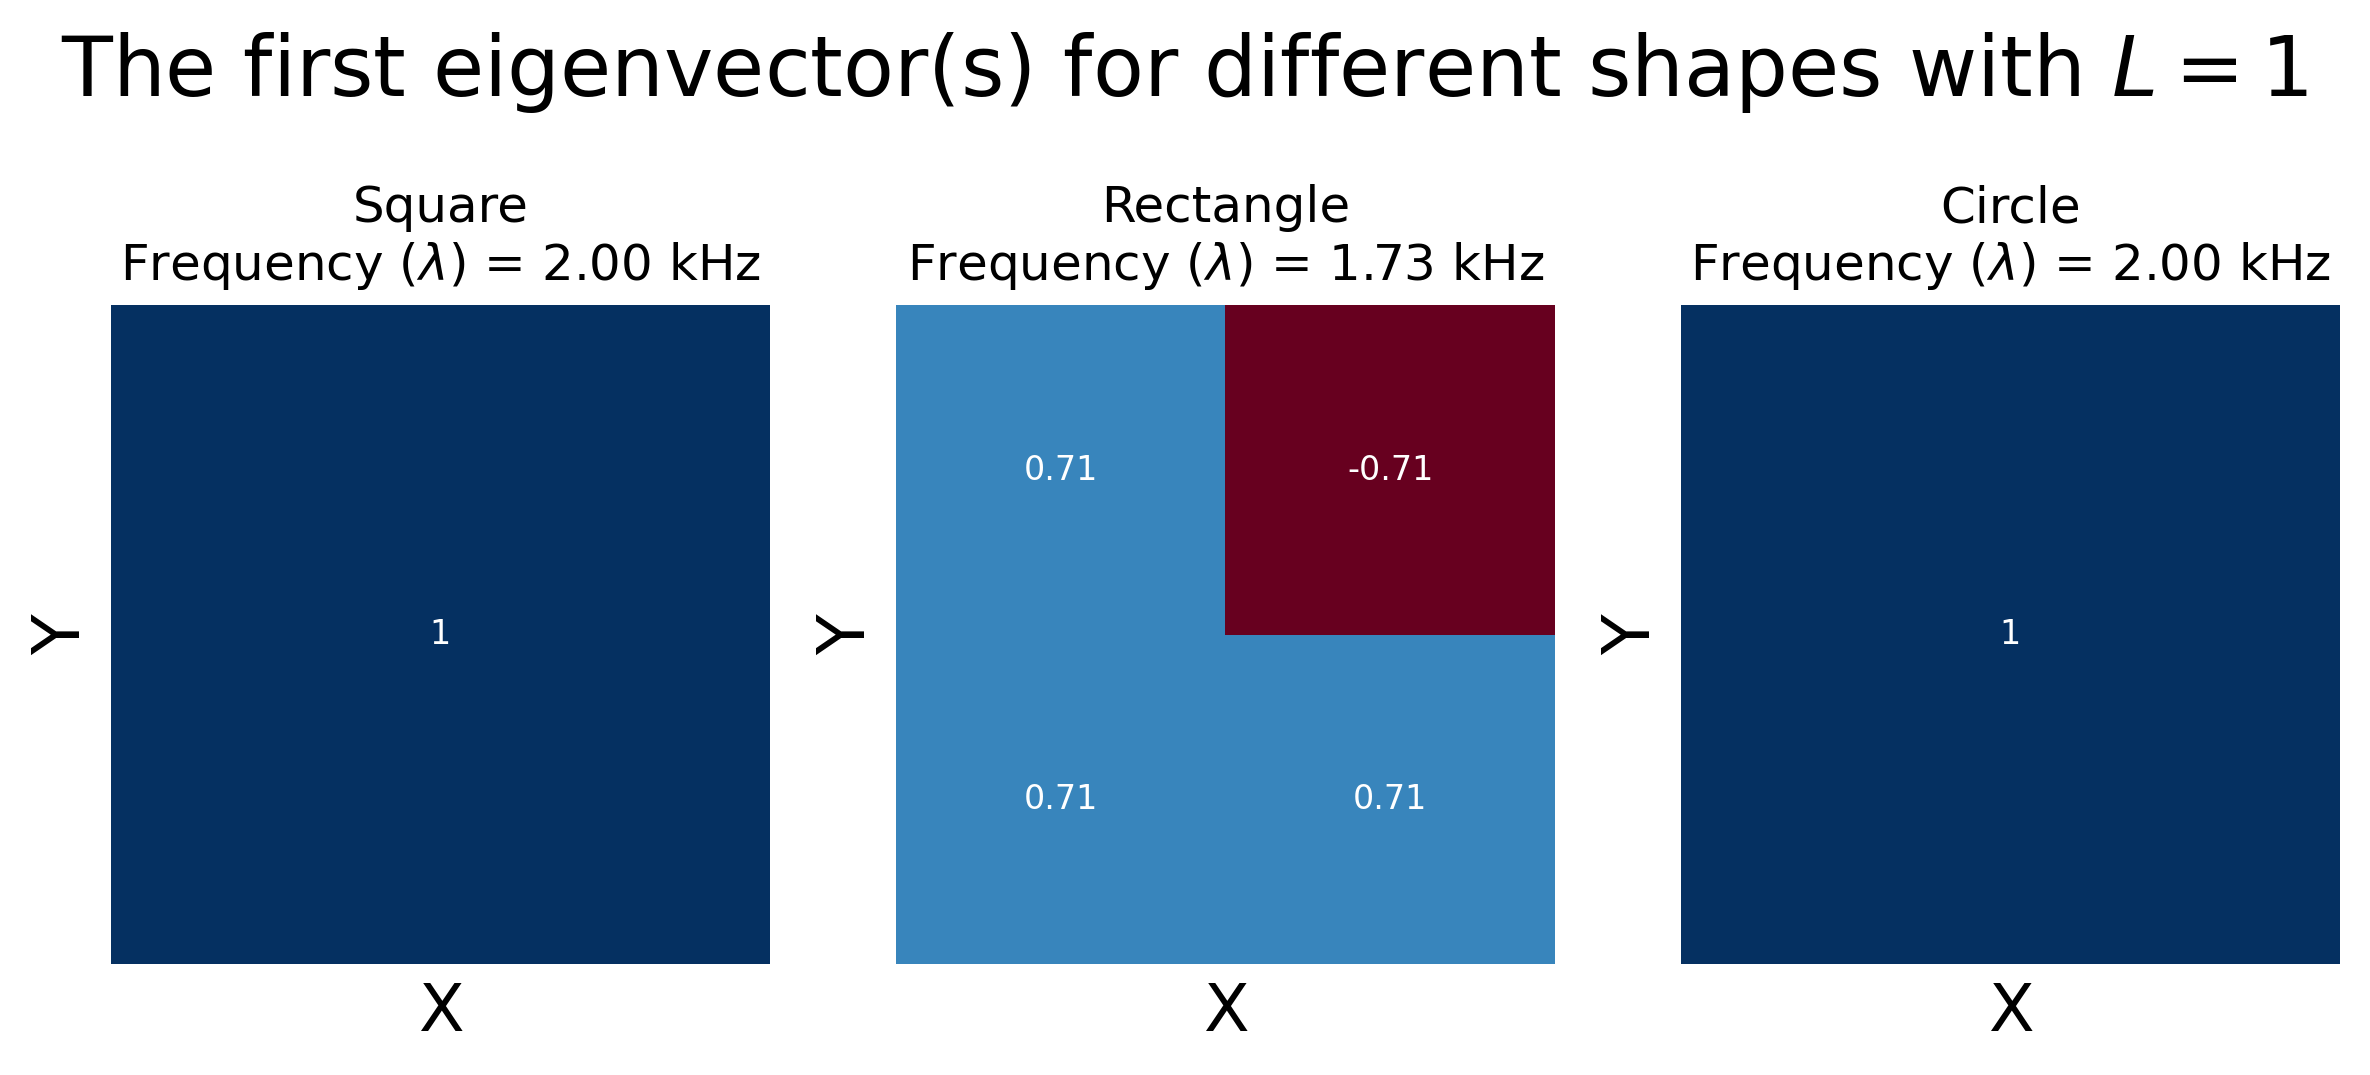

In [ ]:
fig, ax = plt.subplots(1, len(shapes), figsize=(FIG_SIZE))
L = 1

for i, shape in enumerate(shapes):
    v = initialize_grid_vector(L, shape=shape)
    M = initialize_tridiagonal_matrix(v, L, False)
    frequencies, eigenvectors = solve_eigenvalues(M)

    create_seaborn_heatmap(eigenvectors, ax[i], True, True, cmap="RdBu")
    ax[i].set_title(
        f"{shape.capitalize()}\nFrequency ($\\lambda$) = {frequencies[0].real:.2f} kHz"
    )
    ax[i].set_xlabel("X", fontsize=FIG_LABEL_SIZE)
    ax[i].set_ylabel("Y", fontsize=FIG_LABEL_SIZE)
    ax[i].tick_params(axis="both", labelsize=FIG_TICK_SIZE)

plt.suptitle(
    f"The first eigenvector(s) for different shapes with $L={L}$",
    y=0.8,
    fontsize=FIG_TITLE_SIZE,
)

plt.tight_layout()
plt.savefig(f"{FIG_DIR}small_eigenvalues.png", bbox_inches="tight", dpi=FIG_DPI)
plt.show()
plt.close()

In [8]:
L = 50
v.flatten
v = initialize_grid_vector(L, shape=shape)

In [9]:
%%time
M = initialize_tridiagonal_matrix(vector=v, L=L, sparse=False)

frequencies, eigenvectors = solve_eigenvalues(M)

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 22.82 seconds with matrix of size 2500, N=50
CPU times: user 56.3 s, sys: 3min 32s, total: 4min 28s
Wall time: 22.8 s


In [10]:
%%time
M = initialize_tridiagonal_matrix(vector=v, L=L, sparse=True)

frequencies, eigenvectors = solve_eigenvalues(M)

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 1.48 seconds using sparse solver with matrix of size 2500, N=50
CPU times: user 3.28 s, sys: 14.3 s, total: 17.6 s
Wall time: 1.53 s


In [ ]:
def plot_shape_modus(shape: str, shift: int = 0, save: bool = False) -> None:
    """
    Plot the eigenmodes of a given shape.

    Params
    ----------
    - shape (str): The shape of the grid.
    - shift (int): The shift of the eigenmode.
    - save (bool): If True, the plot will be saved.
    """
    L = 50
    v = initialize_grid_vector(L, shape=shape)
    M = initialize_tridiagonal_matrix(v, L, sparse=True)

    frequencies, eigenvectors = solve_eigenvalues(M, num_eigen=5)
    frequencies = frequencies[shift : PLOTS_AMOUNT + shift]
    eigenvectors = eigenvectors[:, shift : PLOTS_AMOUNT + shift]

    plot_multiple_eigenmodes(
        PLOTS_AMOUNT,
        frequencies,
        eigenvectors,
        L,
        shape=shape,
        shift=shift,
        save_img=save,
    )


plot_shape_modus("square", shift=1, save=True)

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 2.39 seconds using sparse solver with matrix of size 2500, N=50
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 1.60 seconds using sparse solver with matrix of size 2500, N=50


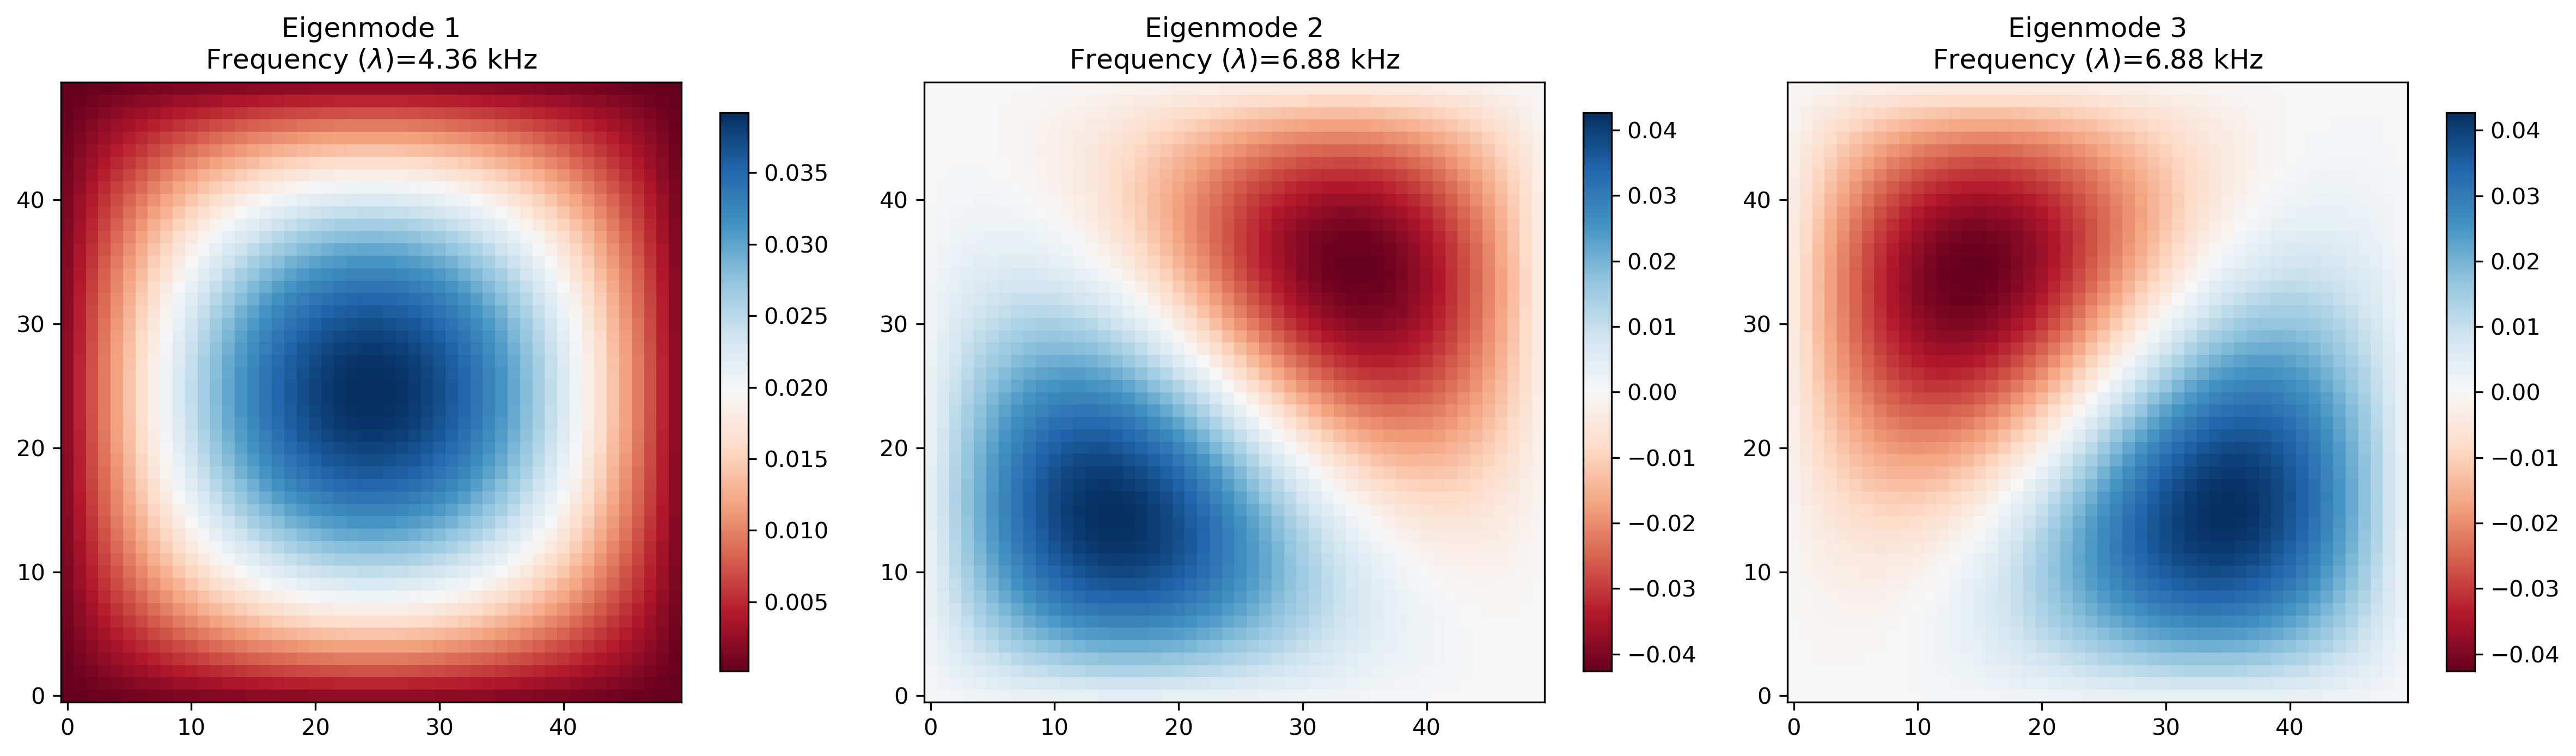

In [ ]:
plot_shape_modus("square", shift=1, save=True)
plot_shape_modus("square", shift=1)

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 3.83 seconds using sparse solver with matrix of size 5000, N=70
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 6.32 seconds using sparse solver with matrix of size 5000, N=70


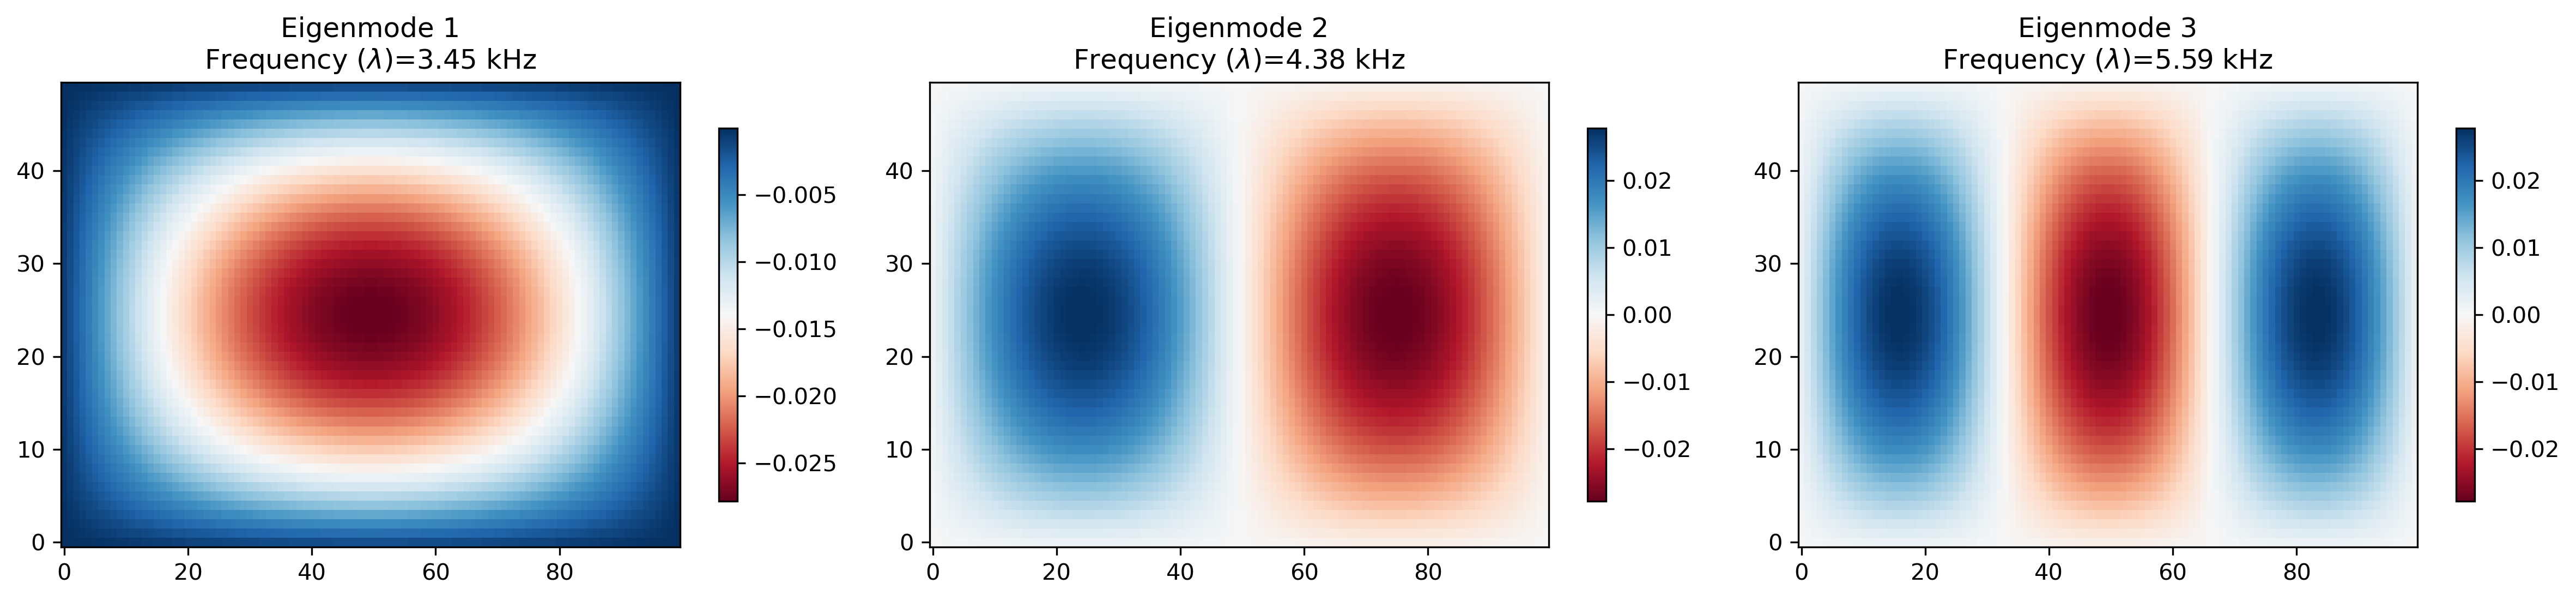

In [ ]:
plot_shape_modus("rectangle", shift=1, save=True)
plot_shape_modus("rectangle", shift=1)

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 1.07 seconds using sparse solver with matrix of size 2500, N=50
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 2.99 seconds using sparse solver with matrix of size 2500, N=50


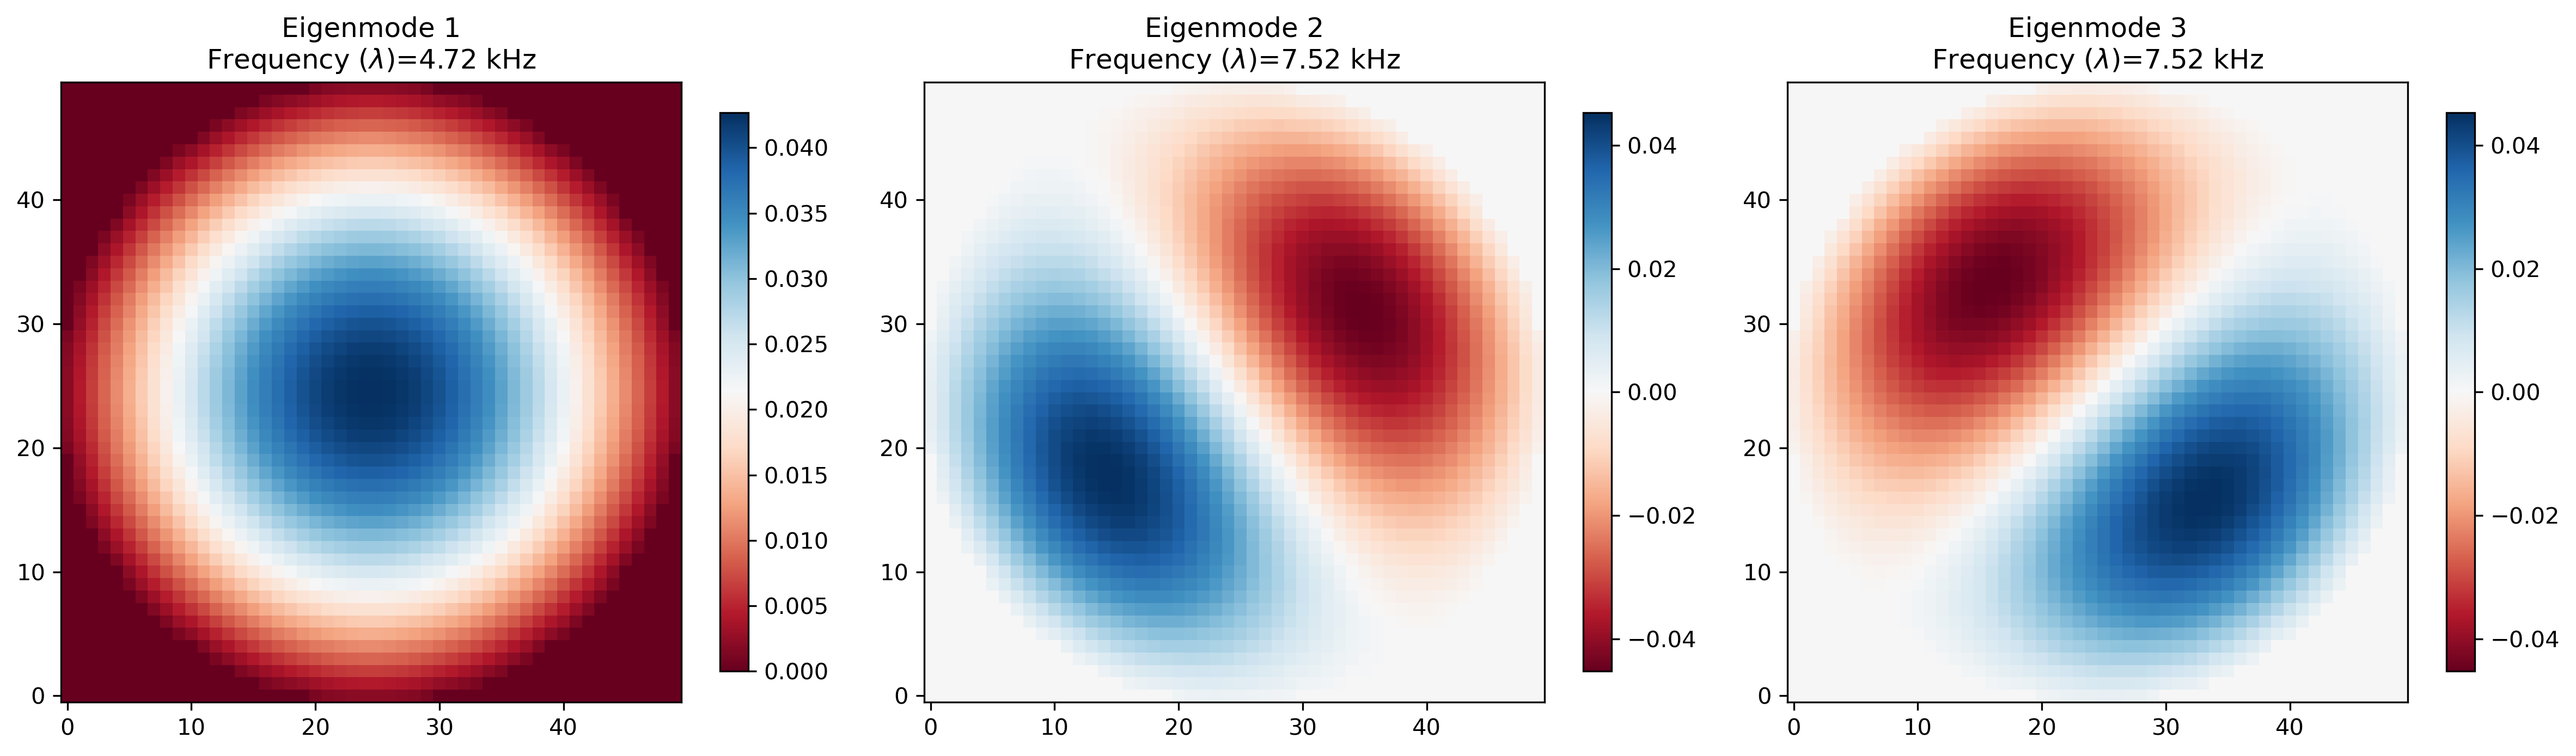

In [ ]:
plot_shape_modus("circle", shift=1, save=True)
plot_shape_modus("circle", shift=1)

In [15]:
def plot_shape_frequency(shape: str) -> None:
    """
    Plot the frequency of a given shape.

    Params
    ----------
    - shape (str): The shape of the grid.
    """
    L_list = np.linspace(10, 100, 5).astype(int)
    frequencies_list = get_frequencies_list(L_list, shape=shape)

    mean_freq = np.mean(frequencies_list, axis=1)
    plot_eigenfrequency(L_list, mean_freq, shape, save_img=False)

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.00 seconds using sparse solver with matrix of size 100, N=10
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: -0.36 seconds using sparse solver with matrix of size 1024, N=32
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 1.16 seconds using sparse solver with matrix of size 3025, N=55
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 1.09 seconds using sparse solver with matrix of size 5929, N=77
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 5.14 seconds using sparse solver with matrix of size 10000, N=100


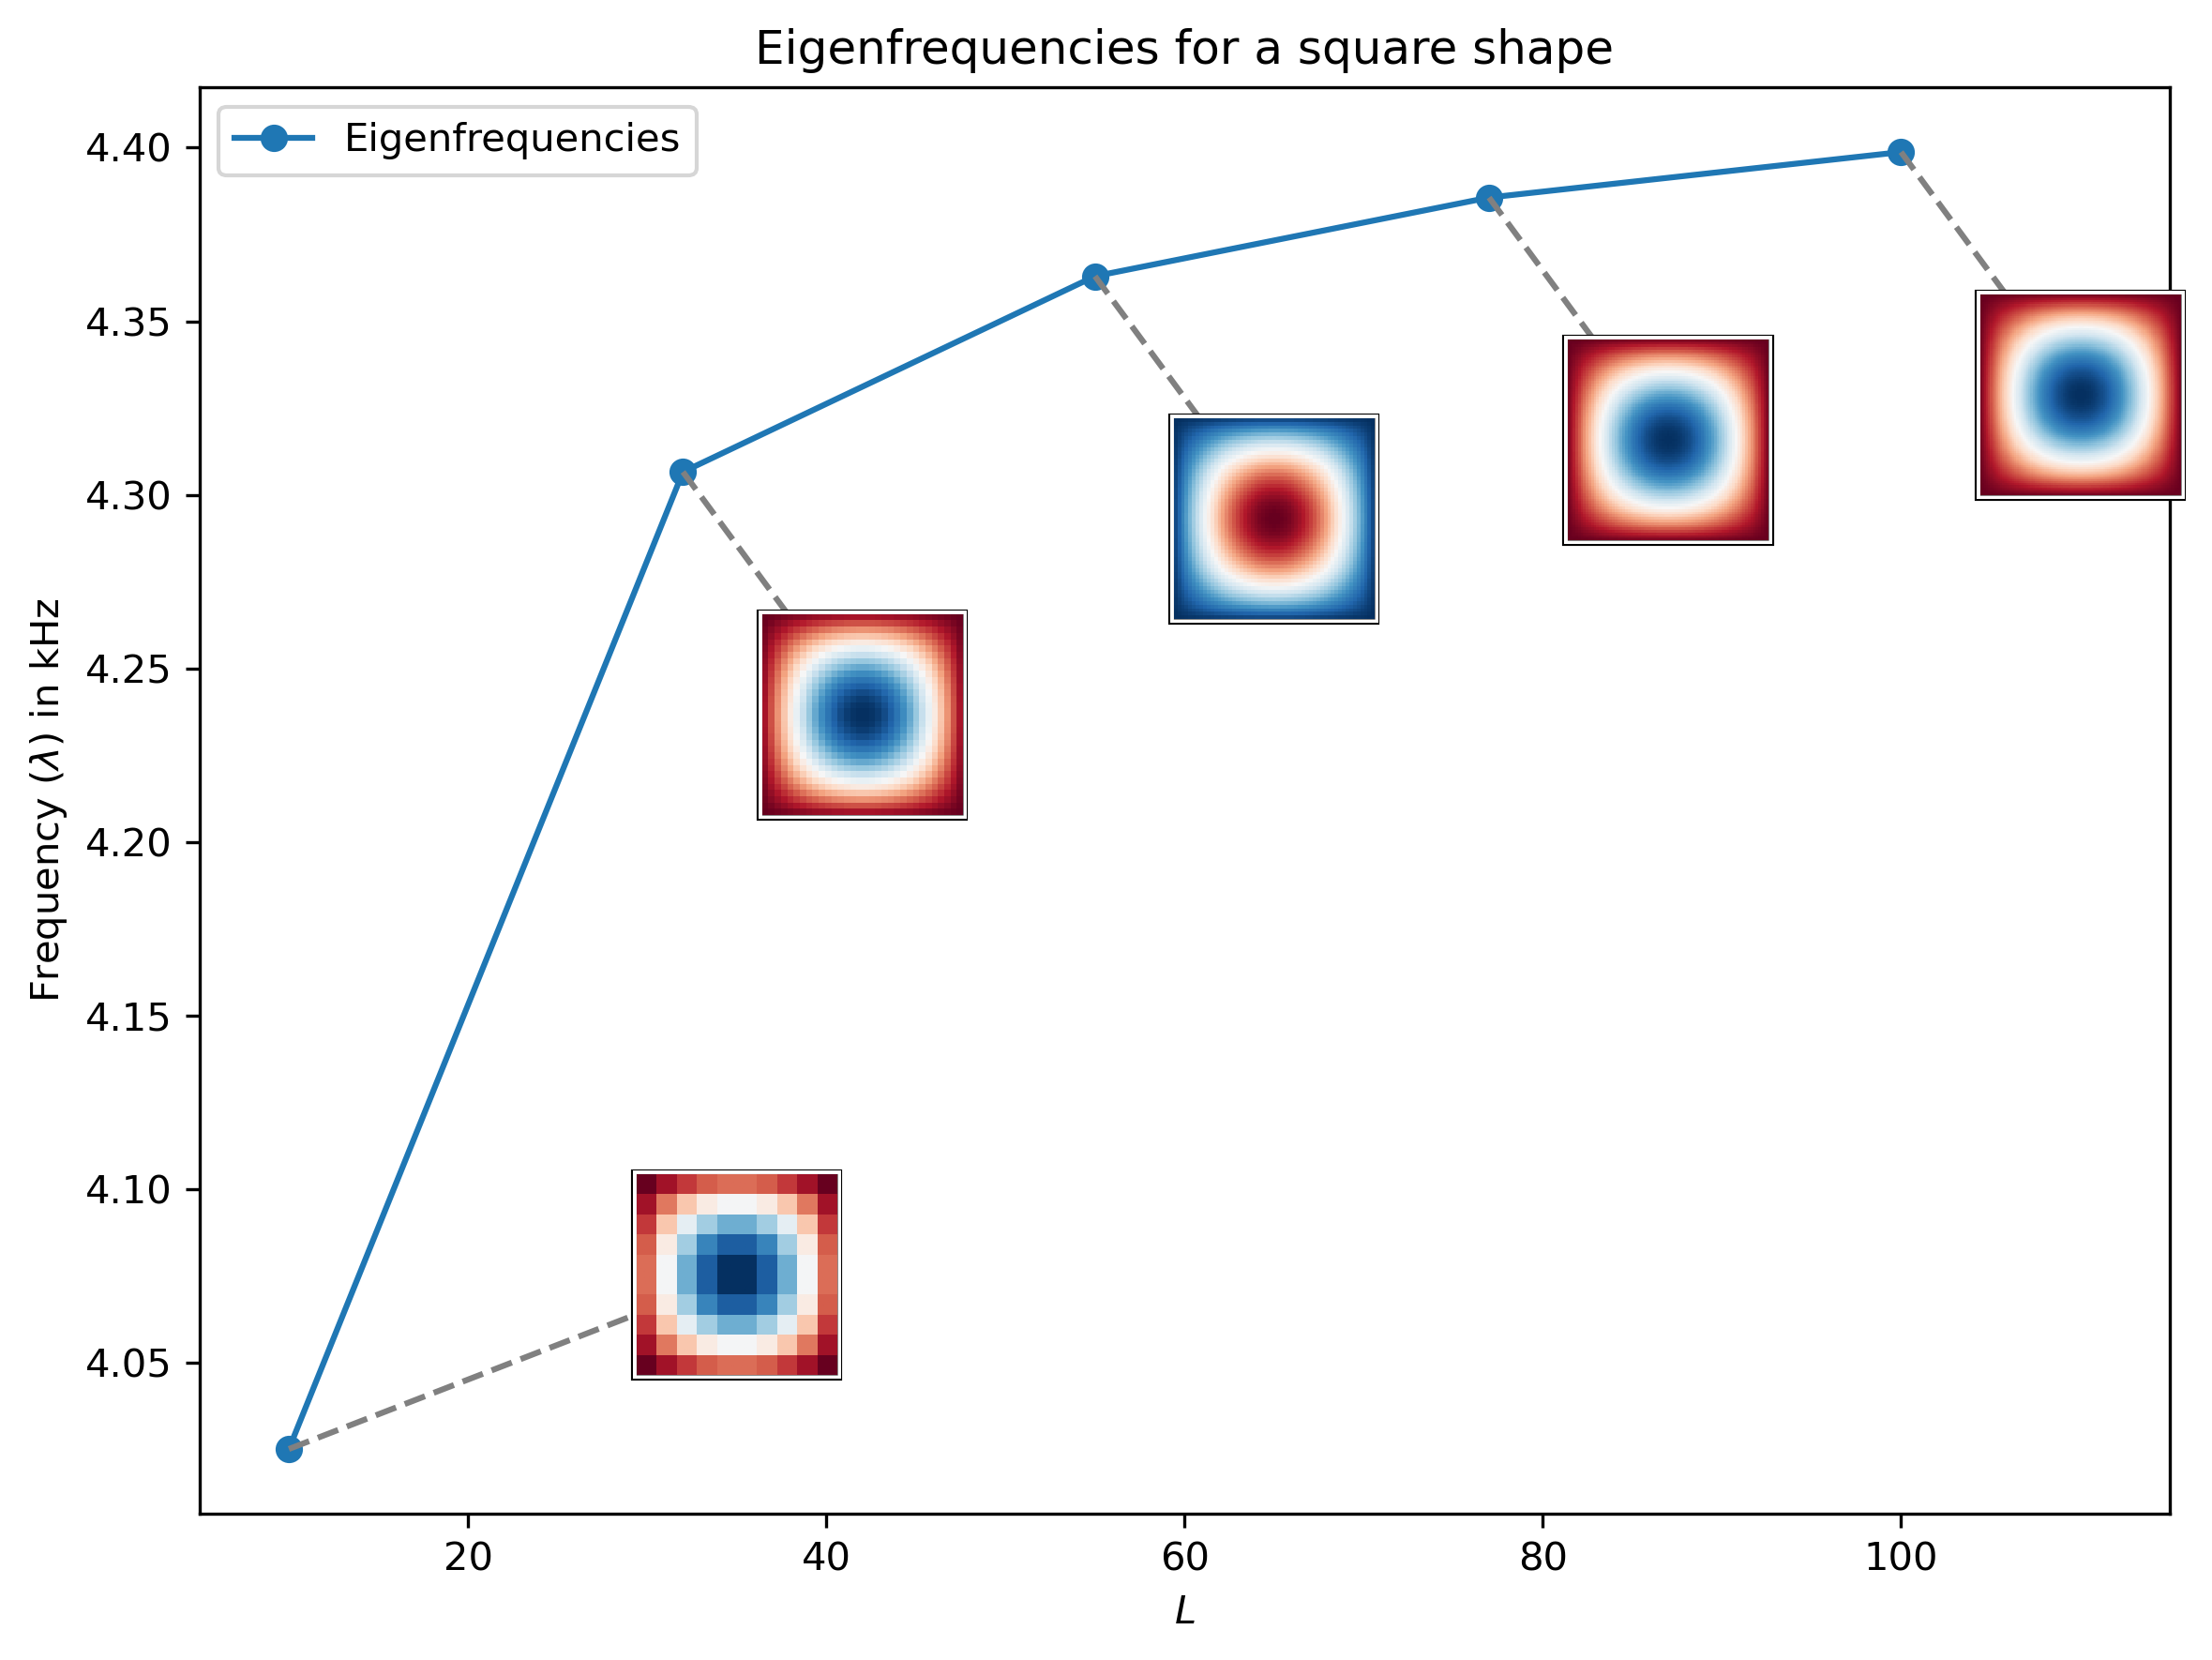

In [16]:
plot_shape_frequency("square")

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.00 seconds using sparse solver with matrix of size 200, N=14
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 2.47 seconds using sparse solver with matrix of size 2048, N=45
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 2.20 seconds using sparse solver with matrix of size 6050, N=77
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 9.16 seconds using sparse solver with matrix of size 11858, N=108
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 12.42 seconds using sparse solver with matrix of size 20000, N=141


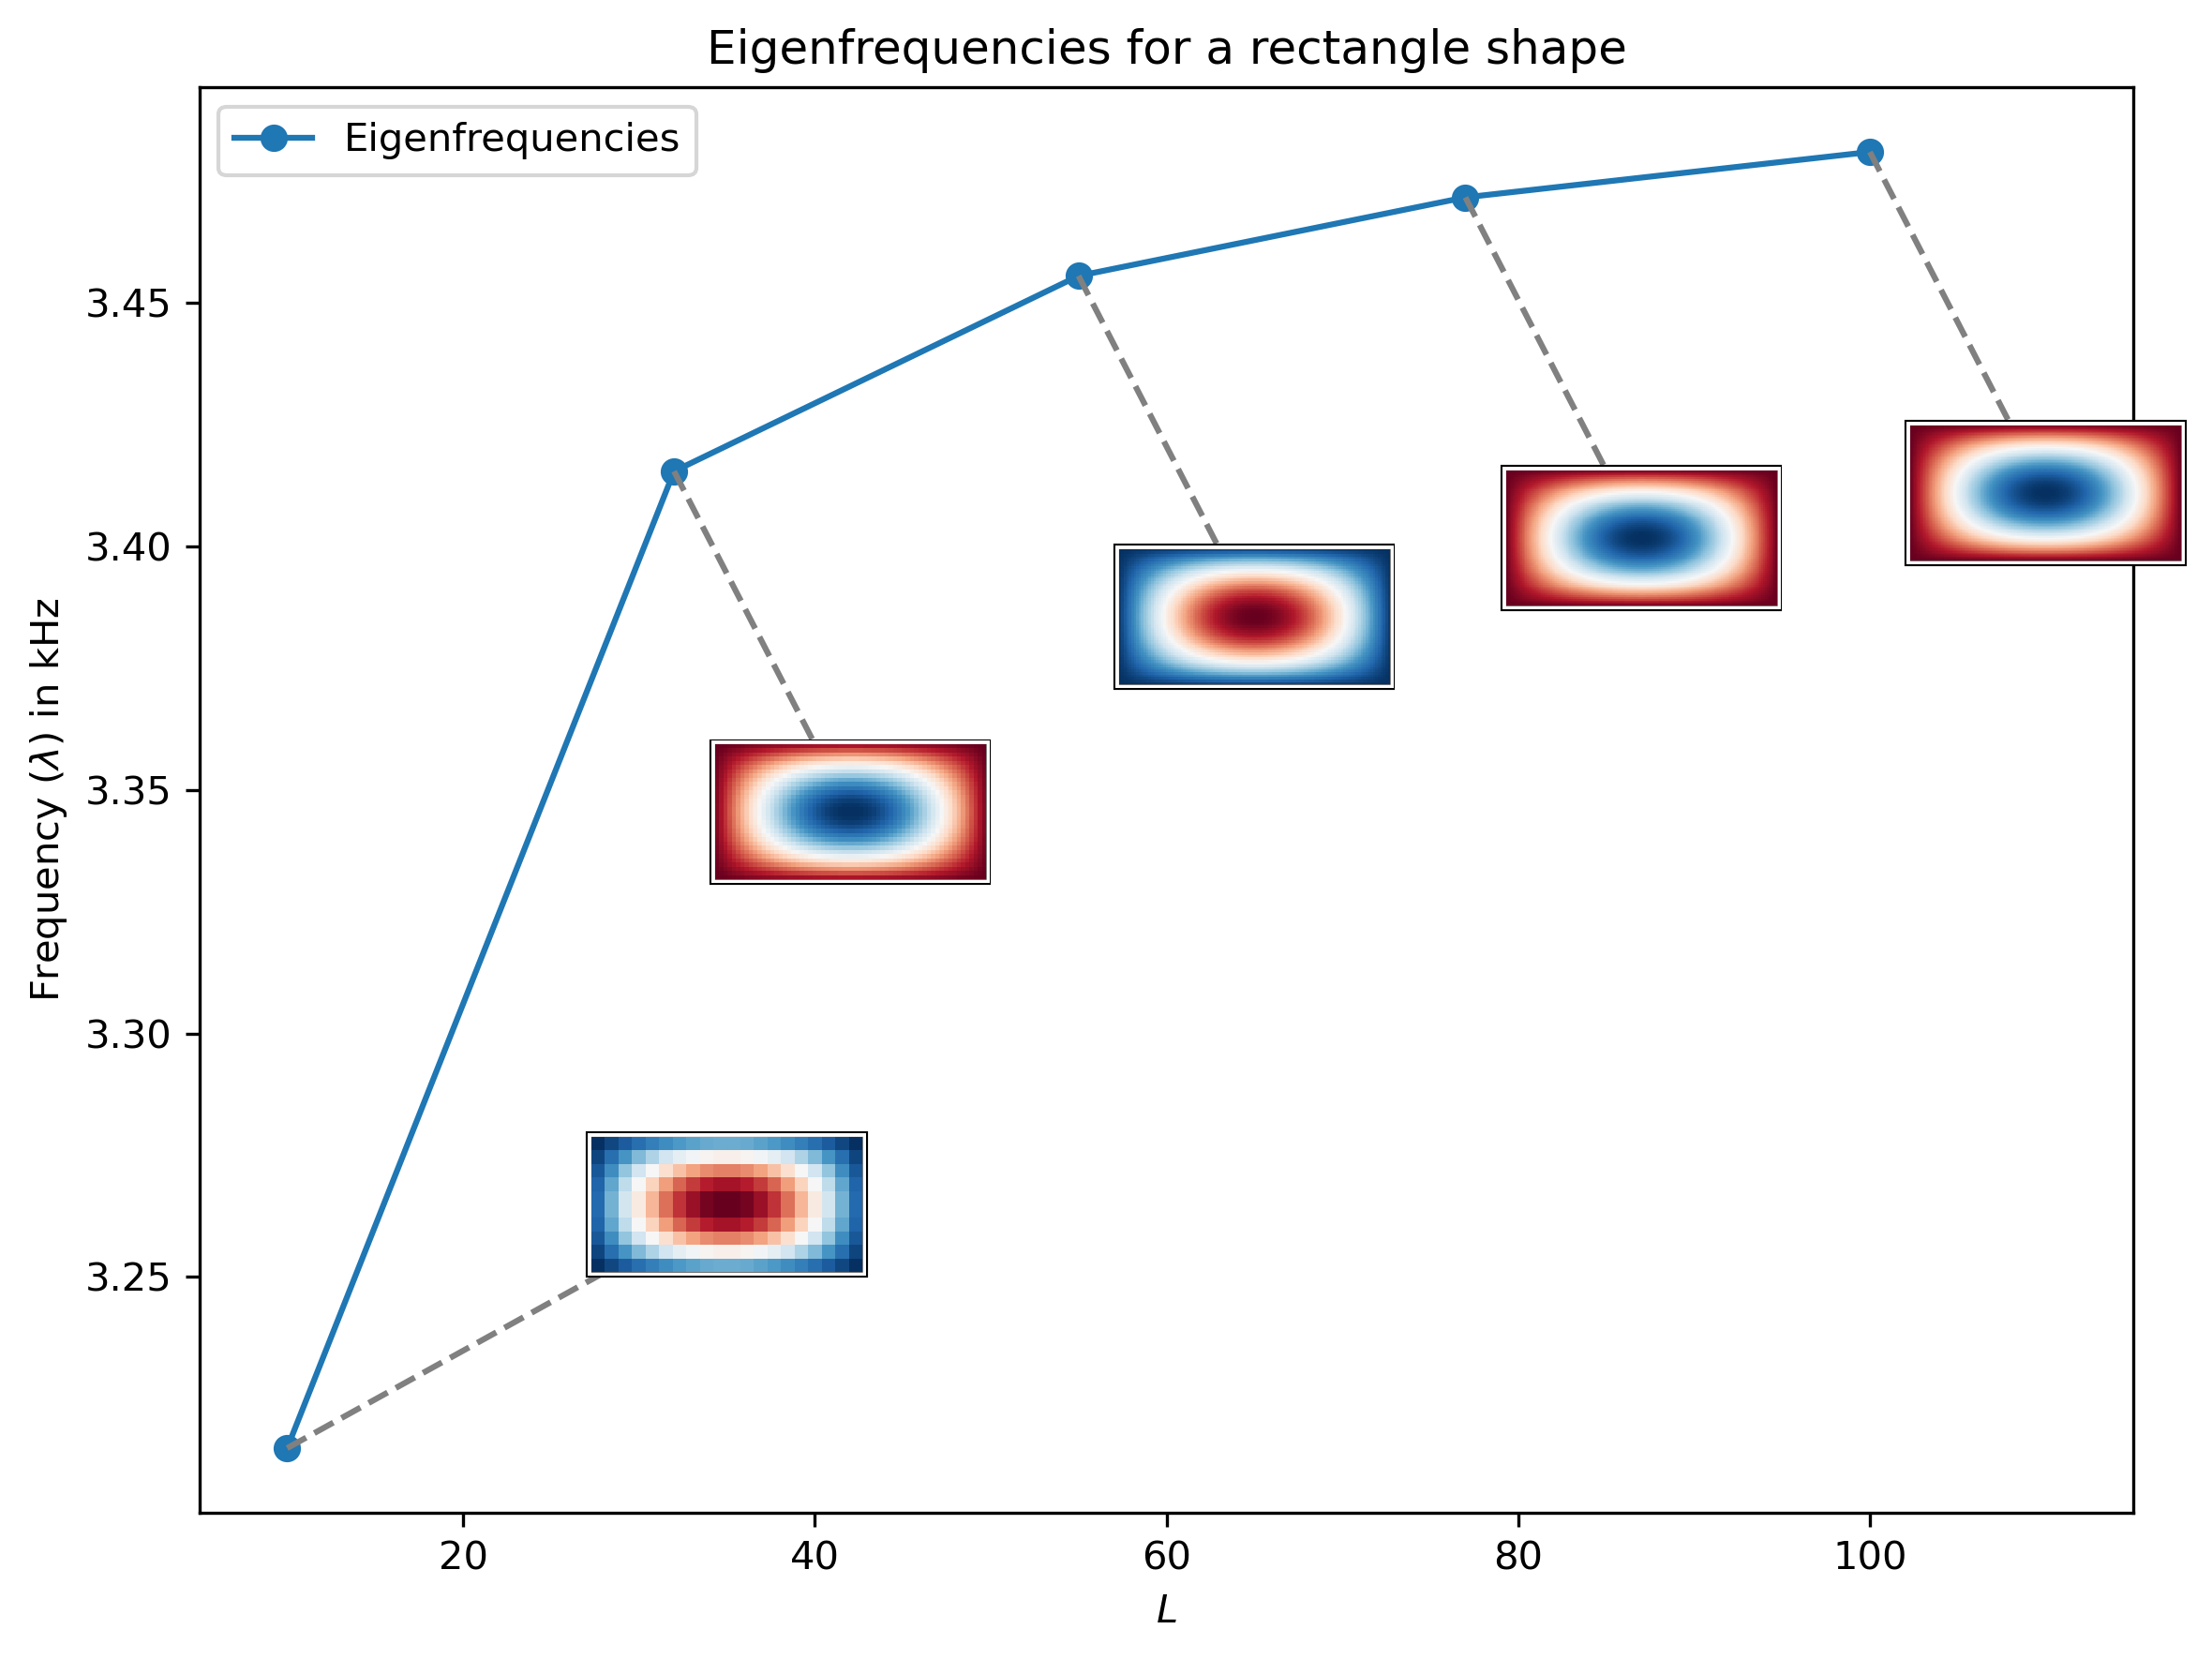

In [17]:
plot_shape_frequency("rectangle")

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.00 seconds using sparse solver with matrix of size 100, N=10
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.17 seconds using sparse solver with matrix of size 1024, N=32
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 1.72 seconds using sparse solver with matrix of size 3025, N=55
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 3.51 seconds using sparse solver with matrix of size 5929, N=77
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 5.22 seconds using sparse solver with matrix of size 10000, N=100


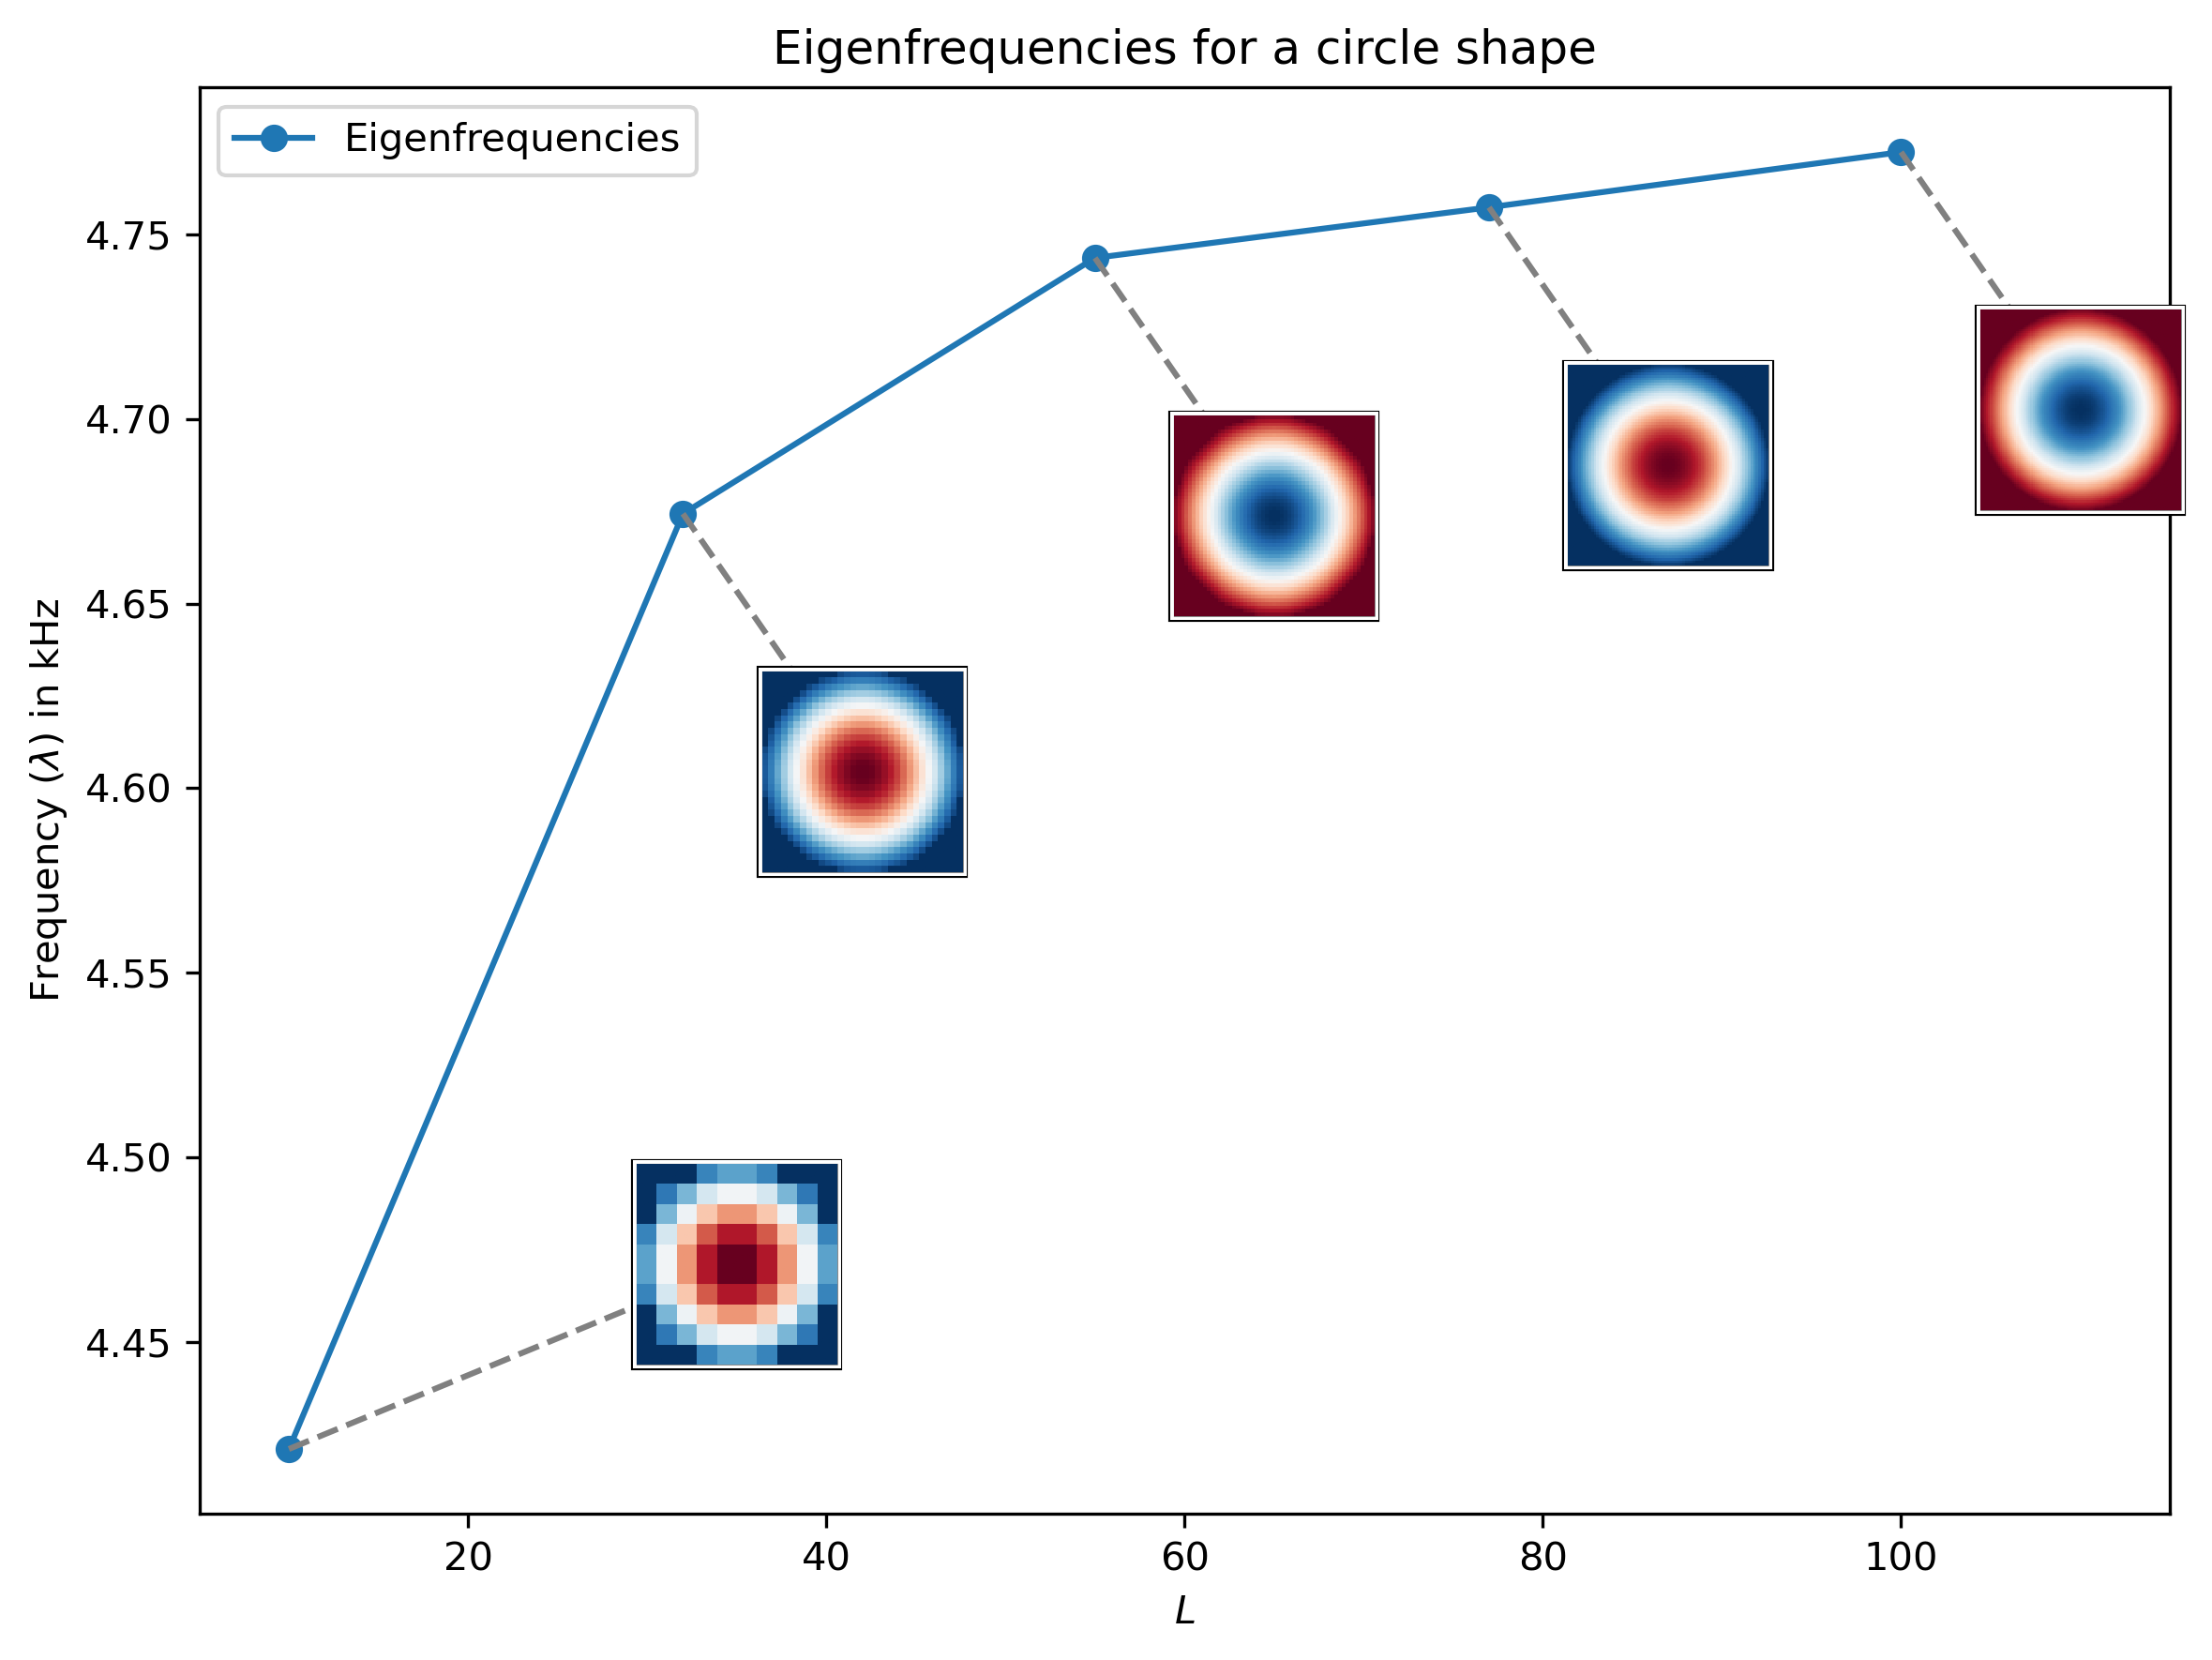

In [18]:
plot_shape_frequency("circle")

In [19]:
def plot_shape_gif(shape: str) -> None:
    t_list = np.linspace(0, TIME_MAX, TIME_STEPS)
    L = 50
    v = initialize_grid_vector(L, shape=shape)
    M = initialize_tridiagonal_matrix(vector=v, L=L, sparse=True)

    frequencies, eigenvectors = solve_eigenvalues(M)

    eigenmodus = (
        eigenvectors[:, SELECT_MODE]
        .reshape(L, L if shape != "rectangle" else 2 * L)
        .real
    )
    frequency = frequencies[SELECT_MODE]

    plot_eigenmode_animation(1.0, eigenmodus, frequency, t_list, shape, delete_img=True)

In [20]:
plot_shape_gif("square")
HTML(f'<img src="results/square_wave.gif">')

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 3.89 seconds using sparse solver with matrix of size 2500, N=50


In [21]:
plot_shape_gif("rectangle")
HTML(f'<img src="results/rectangle_wave.gif">')

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 4.52 seconds using sparse solver with matrix of size 5000, N=70


In [22]:
plot_shape_gif("circle")
HTML(f'<img src="results/circle_wave.gif">')

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 1.77 seconds using sparse solver with matrix of size 2500, N=50


-----
# 3.2 Direct methods for solving the steady state problems
_by: Michael MacFarlane Glasow_

In [23]:
from src.direct_method import direct_method, plot_concentration
from src.config import DIAGONAL_VALUE, OFF_DIAGONAL_VALUE


b[2032] successfully set to 1.0


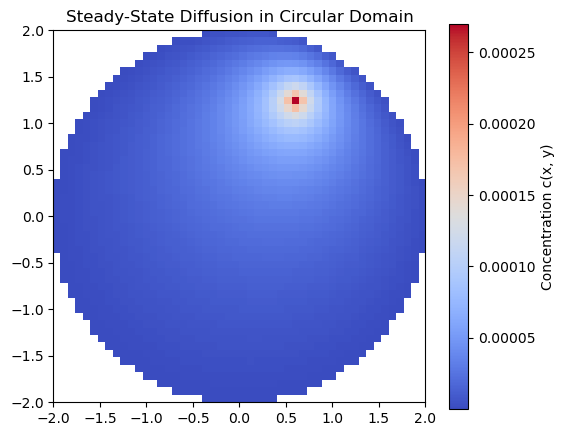

In [24]:
plot_concentration(L=50)

In [25]:
# SOME CODE

-----
# 3.3 The leapfrog method - efficient time integration
In this part, we solve a simple one dimensional harmonic oscillator equation using the leapfrog method.

First, we solve the equation for position and velocity for different values of $k$ and plot the results.

Next, we investigate how the initial velocity at the half step affects the accuracy of the method by comparing it to the analytical solution and testing with different sizes of the time steps $\Delta t$.

Finally, we add an external time-dependent sinusoidal driving force and investigate what happens when the driving force is close to the original frequency of the oscillator and show the phase plot (v, x) of various frequencies. 

_by: Anezka Potesilova_

In [26]:
from src.leapfrog import (
    leapfrog,
    plot_leapfrog_various_k,
    plot_leapfrog_errors,
    plot_leapfrog_errors_start_end,
    plot_leapfrog_driving_force,
    plot_leapfrog_phase_plots,
)

### I. Leapfrog method

We test three values of $k = 0.5, 2, 10$ and the default time step size $\Delta t = 0.01$, and we plot the position and velocity for each of them.

Total time $T$ is used to calculate the number of iterations/steps we will do, i.e. $T = \#steps \cdot \Delta t$.

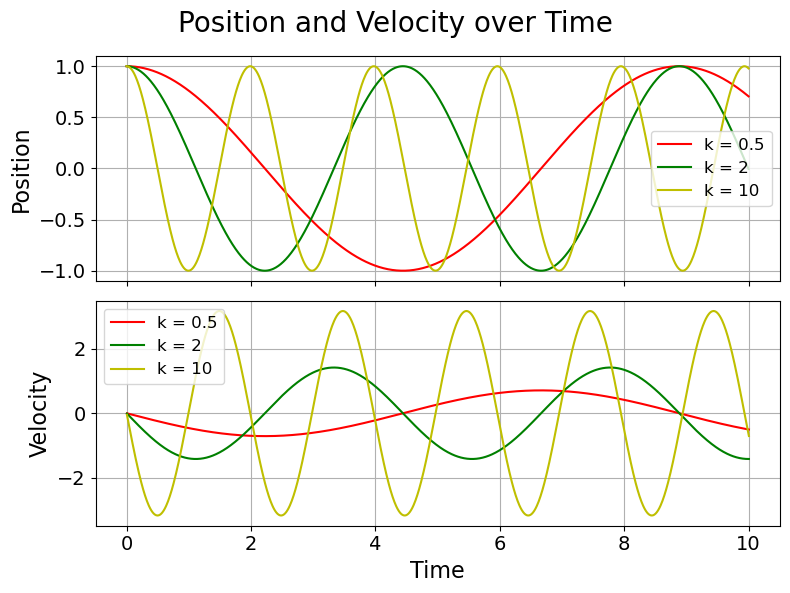

In [27]:
T = 10


def F_x(x, k):
    return -k * x


k_values = [0.5, 2, 10]
positions = []
velocities = []

for k in k_values:
    x_list, v_list = leapfrog(T, F_x, k)
    positions.append(x_list)
    velocities.append(v_list)

plot_leapfrog_various_k(positions, velocities, k_values, T, save=False)

DISCLAIMER: this part is mainly used for internal testing, to see how the curve behaves and compares to the analytical solution. It is not used to draw any major conclusions as there are better tools and measures for this.

Next, we test how the initial velocity at the half step affects the error of the method for two options of the initial velocity and two step sizes and $k = 5$. We can see that setting $v_{1/2} = 0$ introduces an error at the beginning but as the sinusoidal curve moves along, it evens out and then starts to grow again. On the other hand, for our more exact approximation, the error grows over time as expected.

Due to the sinusoidal nature, if we run the simulation for long enough, the curves will eventually match the exact solution again at least for a brief time before diverging again.

Note that we are taking $T=1000$, which means that for the default $\Delta t = 0.01$, we do a total of $100000$ steps.

In [28]:
T = 1000
k = 5


def F_x(x, k):
    return -k * x


x_list_avg, v_list_avg = leapfrog(T, F_x, k)
x_list_zero, v_list_zero = leapfrog(T, F_x, k, initial_v="zero")

# plot_leapfrog_errors([x_list_avg, x_list_zero], [v_list_avg, v_list_zero], k, T, save=False)

Next, we test the same but for $\Delta t = 0.1$.

We can see that the error grows much faster and that indeed it starts to decrease again as the curve approaches the exact solution.

In [29]:
T = 1000
k = 5
delta_t = 0.1


def F_x(x, k):
    return -k * x


x_list_avg, v_list_avg = leapfrog(T, F_x, k, delta_t=delta_t)
x_list_zero, v_list_zero = leapfrog(T, F_x, k, initial_v="zero", delta_t=delta_t)

# plot_leapfrog_errors([x_list_avg, x_list_zero], [v_list_avg, v_list_zero], k, T, save=False)

We can also check how the solutions diverge at the beginning of the period vs at the end by looking at $T \in [0,5]$ and $T \in [995,1000]$

In [30]:
T = 1000
k = 5
delta_t = 0.05


def F_x(x, k):
    return -k * x


x_list_avg, v_list_avg = leapfrog(T, F_x, k, delta_t=delta_t)
x_list_zero, v_list_zero = leapfrog(T, F_x, k, initial_v="zero", delta_t=delta_t)

# plot_leapfrog_errors_start_end([x_list_avg, x_list_zero], k, T, delta_t=delta_t, save=False)

### J. External driving force

Lastly, we add the external time-dependent sinusoidal driving force, $F(t) = F_0 \sin(\omega_{drive} t)$.

We fix $F_0 = 0.5$, $\Delta t = 0.01$, $k =1$, and test for different values of $\omega_{drive}$. We take these as multiplications of the original $\omega$ to be able to investigate what happens when the frequency is close to the original frequency of the oscilator which corresponds to $\omega_{drive} \approx \omega$.

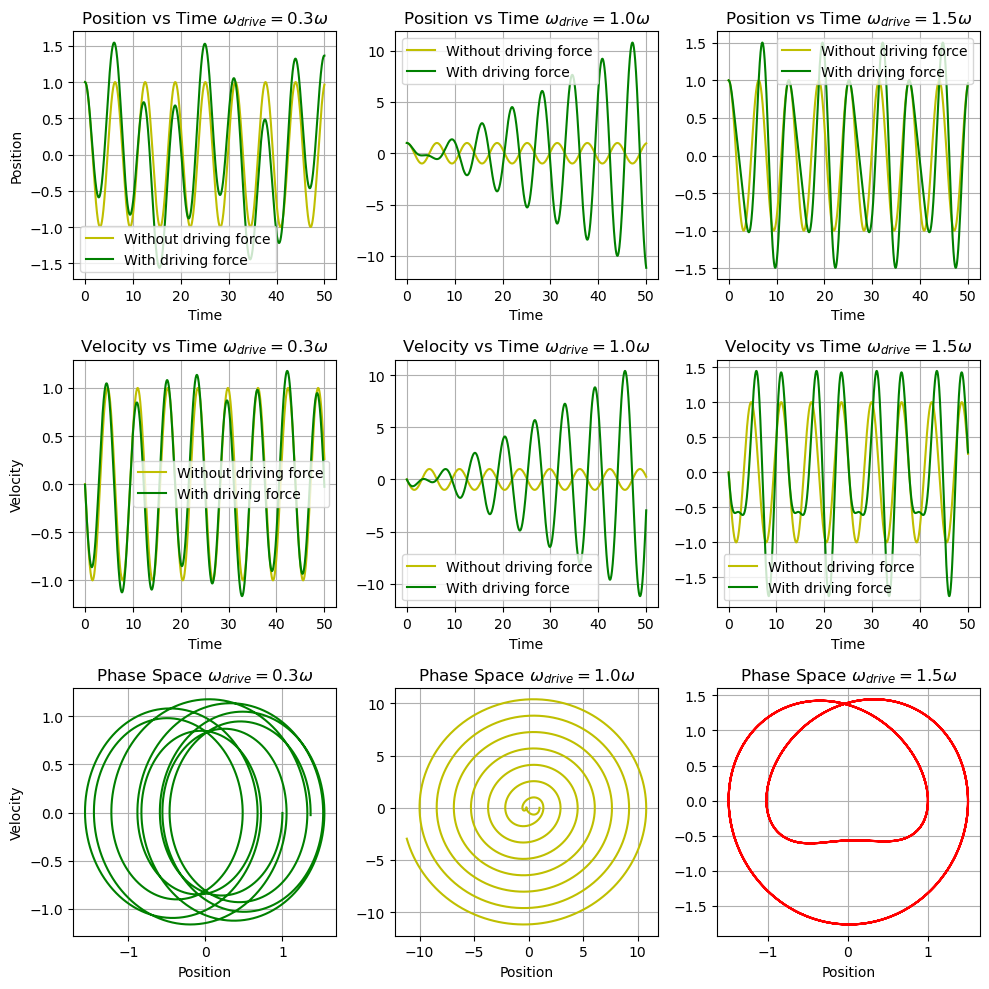

In [31]:
T = 50
k, m = 1, 1
delta_t = 0.01
omega = (k / m) ** 0.5

omegas = [omega * 0.3, omega, omega * 1.5]
F_0 = 0.5


def F_x(x, k):
    return -k * x


positions = []
velocities = []

for omega_drive in omegas:

    def F_t(t):
        return F_0 * np.sin(omega_drive * t)

    x_list, v_list = leapfrog(T, F_x, k, F_t=F_t)
    positions.append(x_list)
    velocities.append(v_list)

plot_leapfrog_driving_force(
    positions, velocities, omegas, T, delta_t=delta_t, k=k, m=m, save=False
)

Lastly, we plot only the phase plots for 4 values of $\omega_{drive}$ to be used in the report. The previous figure wouldn't fit and would be difficult to read.

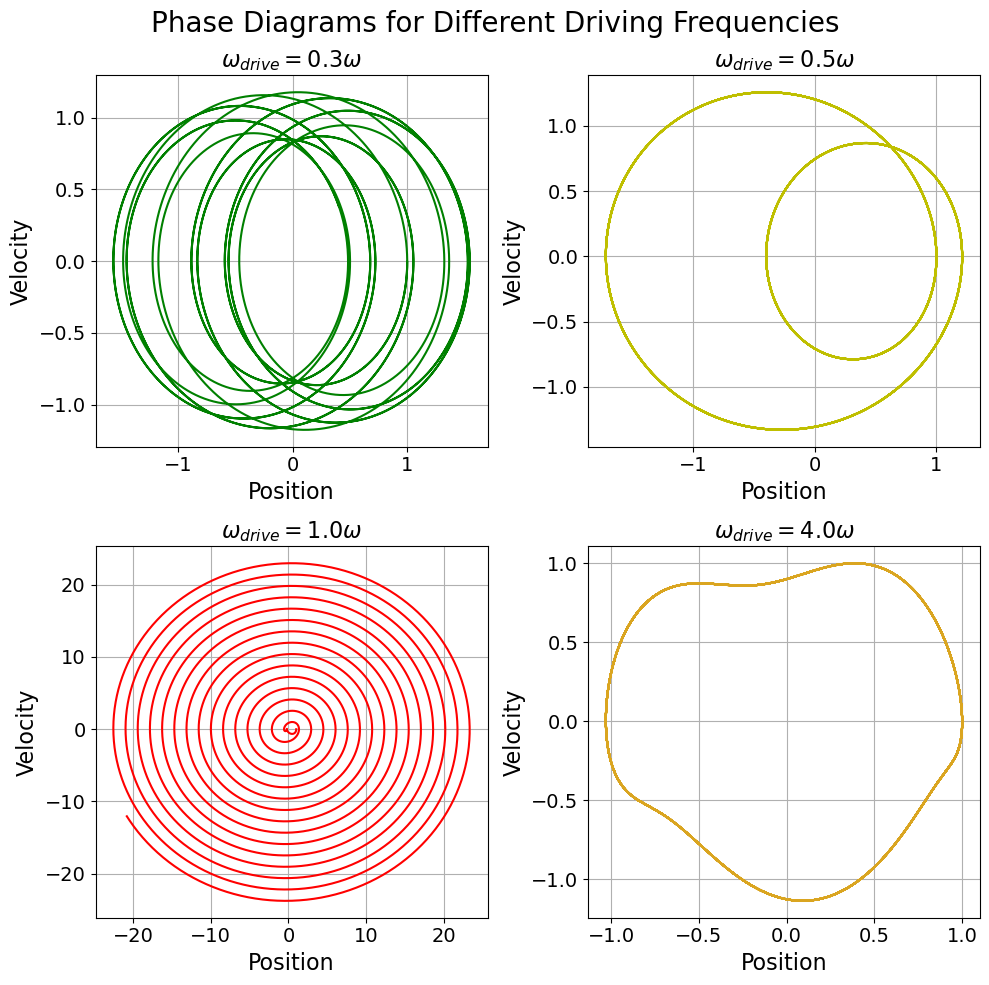

In [32]:
T = 100
k, m = 1, 1
omega = (k / m) ** 0.5

omegas = [omega * 0.3, omega * 0.5, omega, omega * 4]
F_0 = 0.5


def F_x(x, k):
    return -k * x


positions = []
velocities = []

for omega_drive in omegas:

    def F_t(t):
        return F_0 * np.sin(omega_drive * t)

    x_list, v_list = leapfrog(T, F_x, k, F_t=F_t)
    positions.append(x_list)
    velocities.append(v_list)

plot_leapfrog_phase_plots(positions, velocities, omegas, k=k, m=m, save=False)